# Weak Kidney - Support Vector Machine

In [1]:
import some_load_train_evaluate_functions as ml

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Weak/Failing kidneys data

weak_kidney_df = ml.get_data_of_disease(driver, 'Weak/Failing kidneys')
weak_kidney_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Weak/Failing kidneys
0,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
1,93708,0,66,23.7,116.0,1.218750,0.192,0.127,NaN,0.7,...,109.00,22.0,13.2,58.32,2.870,247.0,32.0,30.1,0.655,0
2,93709,0,75,38.9,72.8,1.121212,0.009,0.017,28.561,0.6,...,129.00,31.0,15.4,NaN,NaN,NaN,21.0,46.5,NaN,0
3,93711,1,56,21.3,165.0,1.290323,0.173,0.079,31.115,0.4,...,40.60,19.0,14.7,31.68,4.086,139.0,16.0,34.8,0.542,0
4,93713,1,67,23.5,63.5,2.047619,0.028,0.028,18.344,0.6,...,238.00,26.0,14.2,NaN,NaN,123.0,27.0,28.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,102950,1,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5556,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0
5557,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
5558,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0


### Training

In [4]:
svm_classifier = ml.LinearSVC(random_state=42)

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

svm_classifier.fit(X_train, y_train)

# Accuracy scores

y_pred = svm_classifier.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, svm_classifier.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.9624550359712231
Testing Accuracy:  0.9644784172661871


## Feature Selection

### Correlation Analysis

In [5]:
svm_classifier_test = ml.LinearSVC(random_state=42)

In [6]:
pos_corr, neg_corr = ml.get_correlated_features(weak_kidney_df,'Weak/Failing kidneys',pos=0.0,neg=-0.0)

corr_features = list(pos_corr.keys()[1:]) + list(neg_corr.keys())
corr_features.remove('Respondent_ID')
corr_features[:30]

['Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Retinol [umol/L]',
 'Osmolality [mmol/Kg]',
 'Age',
 'Ferritin [ng/mL]',
 'Uric Acid [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Chromium [nmol/L]',
 'Insulin [pmol/L]',
 'Potassium [mmol/L]',
 'Red cell distribution width [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Lactate Dehydrogenase [IU/L]',
 'Blood lead [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Monocyte [%]',
 'Segmented neutrophils [%]',
 'BMI',
 'Platelet_Lymphocyte Ratio',
 'Eosinophils [%]',
 'Globulin [g/dL]',
 'Mean cell volume [fL]',
 'Transferrin receptor [nmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Basophils [%]',
 'Gamma Glutamyl Transferase [IU/L]']

In [7]:
ml.evaluate_feature_set(corr_features, svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.933

Recall: 0.152

F1-Score: 0.262


### SelectFromModel

In [8]:
sfm_features = ml.select_from_model_features(svm_classifier_test,X,y)
sfm_features

['Gender',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'A/G Ratio',
 'Blood Urea Nitrogen [mg/dL]',
 'Creatinine [mg/dL]',
 'Globulin [g/dL]',
 'Hematocrit [%]',
 'LDL_HDL Ratio',
 'Lymphocyte [%]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Osmolality [mmol/Kg]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Platelet_WBC Ratio',
 'RBC count [million cells/uL]',
 'Segmented neutrophils [%]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Iron Binding Capacity [umol/L]',
 'Total Lycopene [umol/L]',
 'UIBC [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Creatine Phosphokinase [IU/L]',
 'Hemoglobin [g/dL]']

In [9]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.923

Recall: 0.130

F1-Score: 0.229


### SelectKBest

In [10]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Retinol [umol/L]',
 'Age',
 'Osmolality [mmol/Kg]',
 'Ferritin [ng/mL]',
 'RBC count [million cells/uL]',
 'Uric Acid [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Hematocrit [%]',
 'Hemoglobin [g/dL]',
 'Albumin [g/dL]',
 'Lymphocyte [%]',
 'Potassium [mmol/L]',
 'Chromium [nmol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Red cell distribution width [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Lactate Dehydrogenase [IU/L]',
 'Blood lead [umol/L]',
 'C-Reactive Protein [mg/L]',
 'A/G Ratio',
 'Glycohemoglobin [%]',
 'Total Lycopene [umol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Trans-lycopene [umol/L]',
 'Lymphocyte_Monocyte Ratio',
 'Insulin [pmol/L]',
 'Alpha-crypotoxanthin [umol/L]',
 'Monocyte [%]']

In [11]:
ml.evaluate_feature_set(k_best_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 1.000

Recall: 0.130

F1-Score: 0.231


### Recursive Feature Elimination (RFE) 

In [12]:
rfe_features = ml.select_rfe_features(svm_classifier_test,X,y,n=30,step=0.5)
rfe_features[:30]

['Gender',
 'Hematocrit [%]',
 'LDL_HDL Ratio',
 'Lutein and zeaxanthin [umol/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Osmolality [mmol/Kg]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Platelet_WBC Ratio',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Iron Binding Capacity [umol/L]',
 'Total Lycopene [umol/L]',
 'UIBC [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Albumin [g/dL]',
 'Aspartate Aminotransferase [U/L]',
 'Creatine Phosphokinase [IU/L]',
 'Ferritin [ng/mL]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Hemoglobin [g/dL]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Glycohemoglobin [%]',
 'Globulin [g/dL]',
 'Phosphorus [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Creatinine [mg/dL]',
 'Beta-cryptoxanthin [umol/L]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'A/G Ratio']

In [13]:
ml.evaluate_feature_set(rfe_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.929

Recall: 0.141

F1-Score: 0.245


### Lasso Regularization

In [14]:
l1_selected_features = ml.svc_lasso_select(X_train, y_train, C=0.5)
l1_selected_features[:30]

['Creatinine [mg/dL]',
 'A/G Ratio',
 'Platelet_Lymphocyte Ratio',
 'Globulin [g/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Platelet_WBC Ratio',
 'Gender',
 'Albumin [g/dL]',
 'Creatine Phosphokinase [IU/L]',
 'Total Lycopene [umol/L]',
 'LDL_HDL Ratio',
 'Beta-cryptoxanthin [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Platelet count [1000 cells/uL]',
 'Aspartate Aminotransferase [U/L]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'RBC count [million cells/uL]',
 'Ferritin [ng/mL]',
 'Alanine Aminotransferase [U/L]',
 'Bicarbonate [mmol/L]',
 'Lutein and zeaxanthin [umol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Trans-lycopene [umol/L]',
 'Alpha-tocopherol [umol/L]',
 'Lymphocyte [%]',
 'Phosphorus [mg/dL]',
 'Alkaline Phosphatase [IU/L]',
 'Blood selenium [umol/L]',
 'Iron frozen [umol/L]']

In [15]:
ml.evaluate_feature_set(l1_selected_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.933

Recall: 0.152

F1-Score: 0.262


### Relief F

In [16]:
relieff_features = ml.relief_feature_select(30,X,y, n_jobs=-1)

In [17]:
relieff_features[:30]

['Nucleated RBCs',
 'Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Age',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'RBC count [million cells/uL]',
 'Uric Acid [mg/dL]',
 'Non_HDL Ratio',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Lymphocyte [%]',
 'Albumin [g/dL]',
 'Gender',
 'Transferrin Saturation [%]',
 'Chloride [mmol/L]',
 'UIBC [umol/L]',
 'Glycohemoglobin [%]',
 'Red cell distribution width [%]',
 'Globulin [g/dL]',
 'Total Protein [g/dL]',
 'A/G Ratio',
 'Segmented neutrophils [%]',
 'Total Lycopene [umol/L]',
 'Alpha-tocopherol [umol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Iron frozen [umol/L]']

In [18]:
ml.evaluate_feature_set(relieff_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 0.917

Recall: 0.120

F1-Score: 0.212


### Optimal no. of features

In [19]:
final_features = list(l1_selected_features) 

Finding optimal no. of features..: 100%|████████| 85/85 [08:27<00:00,  5.97s/it]



Maximum accuracy = 0.9637 for 38 features


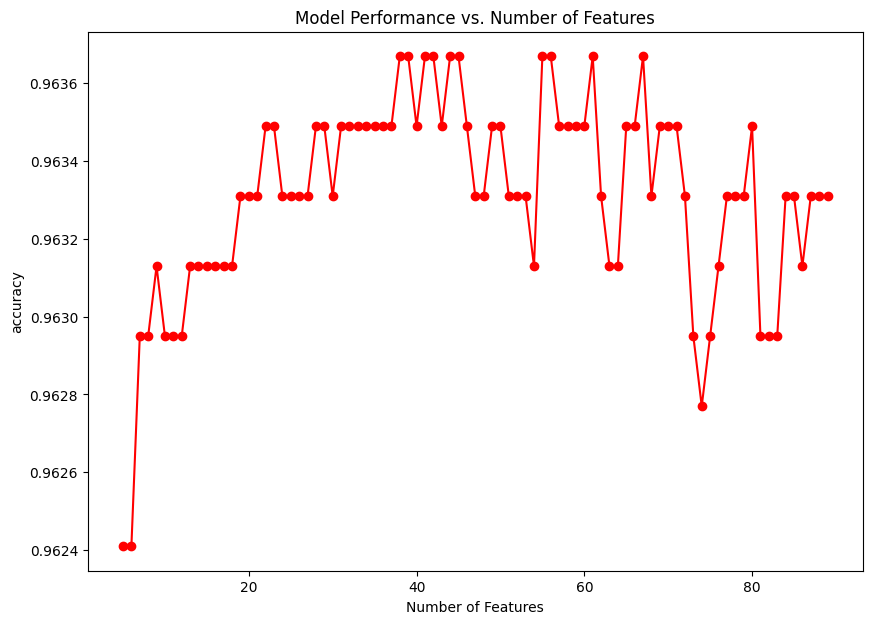

In [20]:
# Optimal no. of features

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='accuracy')

Finding optimal no. of features..: 100%|████████| 85/85 [08:26<00:00,  5.96s/it]



Maximum f1 = 0.2179 for 89 features


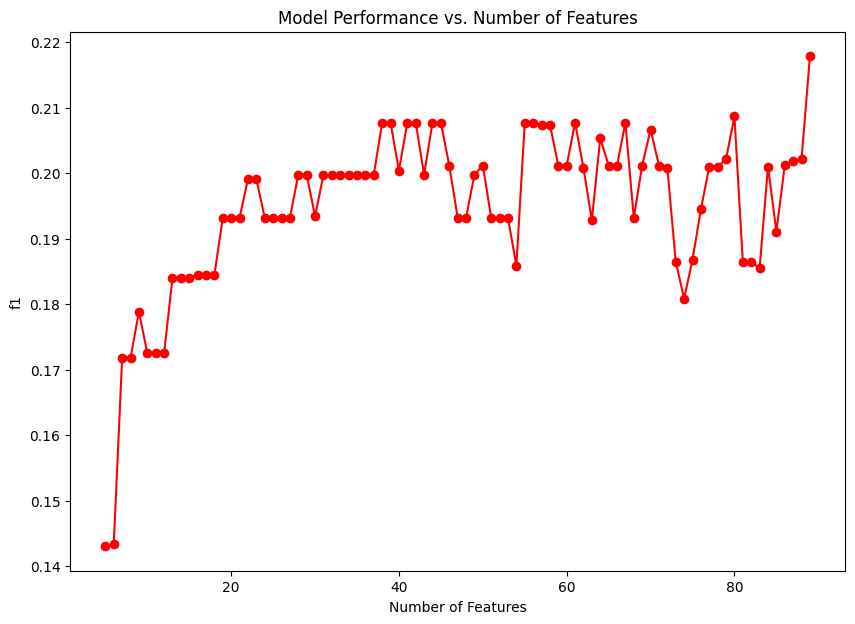

In [21]:
# Optimal no. of features

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='f1')

In [22]:
num_features = 38

selected = final_features[:num_features]
selected.append('Weak/Failing kidneys')

weak_kidney_df = weak_kidney_df[selected]

In [23]:
# Save feature set
    
with open('../Models/Weak kidneys/Feature Sets/SVM Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### Zero Imputation

In [24]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [25]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.933

Recall: 0.152

F1-Score: 0.262


### Mode Imputation

In [26]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [27]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.933

Recall: 0.152

F1-Score: 0.262


### k-NN Imputation

In [28]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [29]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.933

Recall: 0.152

F1-Score: 0.262


### Multiple Imputation by Chained Equations (MICE)

In [30]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [31]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.933

Recall: 0.152

F1-Score: 0.262


### Mean Imputation

In [32]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [33]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.929

Recall: 0.141

F1-Score: 0.245


### Dropping Null Values

In [34]:
# Drop null values
weak_kidney_df_na = weak_kidney_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df_na, label = 'Weak/Failing kidneys',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [35]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.965

Test Accuracy: 0.959

Precision: 0.667

Recall: 0.125

F1-Score: 0.211


### Median Imputation

In [72]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [37]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.933

Recall: 0.152

F1-Score: 0.262


## Oversampling and Undersampling

### Random Oversampling

In [38]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

svm_classifier.fit(X_ros, y_ros)

ml.evaluate_model_metrics(svm_classifier,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.781

Test Accuracy: 0.856

Precision: 0.190

Recall: 0.761

F1-Score: 0.304


### SMOTE (Synthetic Minority Over-sampling Technique)

In [39]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

svm_classifier.fit(X_smote, y_smote)

ml.evaluate_model_metrics(svm_classifier,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.766

Test Accuracy: 0.852

Precision: 0.185

Recall: 0.761

F1-Score: 0.298


### Random Undersampling

In [40]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

svm_classifier.fit(X_rus, y_rus)

ml.evaluate_model_metrics(svm_classifier,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.753

Test Accuracy: 0.819

Precision: 0.146

Recall: 0.696

F1-Score: 0.242


### Tomek Links

In [41]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

svm_classifier.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(svm_classifier,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.964

Precision: 0.933

Recall: 0.152

F1-Score: 0.262


### SMOTE + Tomek Links

In [42]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

svm_classifier.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(svm_classifier,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.766

Test Accuracy: 0.852

Precision: 0.187

Recall: 0.772

F1-Score: 0.301


In [73]:
# ros provides better results

X_train, y_train = X_ros, y_ros

## Hyperparameter Optimization 

### Grid Search

In [44]:
param_grid = {
    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
    'dual': [False], 
    'class_weight': [None, 'balanced'] 

}

In [45]:
grid_best_params, svm_classifier_grid = ml.grid_search_optimize(svm_classifier, param_grid, X_train, 
                                                                y_train, cv=10,scoring='f1')

In [46]:
grid_best_params

{'C': 0.001,
 'class_weight': None,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l2'}

In [47]:
ml.evaluate_model_metrics(svm_classifier_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 0.787

Test Accuracy: 0.853

Precision: 0.190

Recall: 0.783

F1-Score: 0.306


### Random Search

In [48]:
rand_best_params, svm_classifier_rand = ml.random_search_optimize(svm_classifier,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='f1')

In [49]:
rand_best_params

{'penalty': 'l2',
 'loss': 'squared_hinge',
 'dual': False,
 'class_weight': None,
 'C': 0.001}

In [50]:
ml.evaluate_model_metrics(svm_classifier_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 0.787

Test Accuracy: 0.853

Precision: 0.190

Recall: 0.783

F1-Score: 0.306


### Optuna

In [51]:
def objective(trial):

    C = trial.suggest_loguniform('C', 1e-5, 1e3)
    loss = trial.suggest_categorical('loss', ['hinge', 'squared_hinge'])
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    dual = False
    
    if penalty == 'l1' or penalty == 'l2' and loss == 'hinge':
        raise ml.optuna.TrialPruned()

    model = ml.LinearSVC(C=C, loss=loss, penalty=penalty, class_weight=class_weight, dual=dual, random_state=42)
            
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1_score = ml.f1_score(y_test, y_pred)

    return f1_score

In [52]:
best_trial , svm_classifier_opt = ml.optuna_optimize(objective, ml.LinearSVC, n_trials=150)

In [53]:
best_trial

{'C': 0.23758907946716268,
 'loss': 'squared_hinge',
 'penalty': 'l2',
 'class_weight': 'balanced'}

In [54]:
svm_classifier_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(svm_classifier_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 0.781

Test Accuracy: 0.857

Precision: 0.192

Recall: 0.761

F1-Score: 0.306


## Evaluation on Test Set


Train Accuracy: 0.777

Test Accuracy: 0.844

Precision: 0.165

Recall: 0.646

F1-Score: 0.263

Confusion Matrix:

[[1814  314]
 [  34   62]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.98      0.85      0.91      2128
     Class 1       0.16      0.65      0.26        96

    accuracy                           0.84      2224
   macro avg       0.57      0.75      0.59      2224
weighted avg       0.95      0.84      0.88      2224


ROC-AUC Curve:


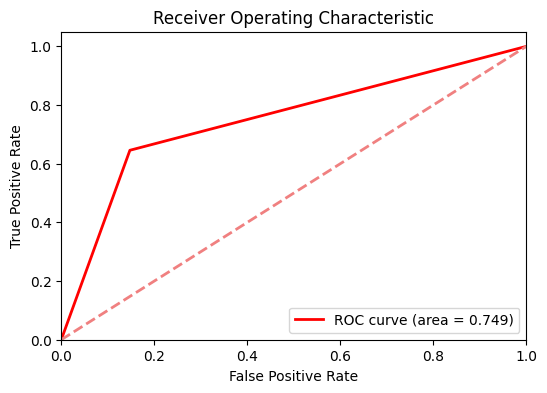

In [55]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(svm_classifier, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [56]:
ml.k_cross_validate(svm_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96582734 0.96582734 0.96402878 0.96402878 0.96402878 0.95863309
 0.96223022 0.96582734 0.96402878 0.96223022]

Mean accuracy score:  0.9636690647482015

Standard deviation:  0.0020974647103759944


In [57]:
ml.k_cross_validate(svm_classifier_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96402878 0.96582734 0.96402878 0.96402878 0.96223022 0.95863309
 0.96223022 0.96402878 0.96223022 0.96223022]

Mean accuracy score:  0.9629496402877697

Standard deviation:  0.0018341796811484725


In [58]:
ml.k_cross_validate(svm_classifier_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96402878 0.96582734 0.96402878 0.96402878 0.96223022 0.95863309
 0.96223022 0.96402878 0.96223022 0.96223022]

Mean accuracy score:  0.9629496402877697

Standard deviation:  0.0018341796811484725


In [59]:
ml.k_cross_validate(svm_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.85071942 0.83633094 0.85251799 0.88129496 0.8705036  0.86870504
 0.86870504 0.83273381 0.85431655 0.84172662]

Mean accuracy score:  0.8557553956834532

Standard deviation:  0.015320531970537298


### Stratified K-fold

In [60]:
ml.stratified_k_cross_validate(svm_classifier,X,y,n_splits=10)


Average Accuracy: 0.9636690647482015

Average Precision: 0.8616666666666667

Average Recall: 0.12114624505928853

Average F1-Score: 0.2081429456212065


In [61]:
ml.stratified_k_cross_validate(svm_classifier_grid,X,y,n_splits=10)


Average Accuracy: 0.9633093525179856

Average Precision: 0.8949999999999999

Average Recall: 0.1077075098814229

Average F1-Score: 0.18642834138486308


In [62]:
ml.stratified_k_cross_validate(svm_classifier_rand,X,y,n_splits=10)


Average Accuracy: 0.9633093525179856

Average Precision: 0.8949999999999999

Average Recall: 0.1077075098814229

Average F1-Score: 0.18642834138486308


In [63]:
ml.stratified_k_cross_validate(svm_classifier_opt,X,y,n_splits=10)


Average Accuracy: 0.8552158273381295

Average Precision: 0.1649232703801063

Average Recall: 0.632411067193676

Average F1-Score: 0.26101031881436476


### Save Model

In [74]:
final_svm_estimator = svm_classifier

In [87]:
# Saving the model

ml.save_model(final_svm_estimator, "../Models/Weak kidneys/SVM.pkl")

Overwrite File? [y/n]: y
Saved Model


## Prediction

In [88]:
# Predicting on perturbed values
sc = ml.np.random.rand()

ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[0], y_test.iloc[0], sc)

Instance:
 [ 0.         -0.68801717 -0.42088403  0.65771378  0.72383802  0.16577864
  1.57195119  0.48497789 -0.03878021 -0.32122496 -0.06414882  0.21609729
 -1.03438808  2.19713343 -0.53829954 -1.19716249 -0.05028868 -1.4234133
 -0.80978922 -1.12963474 -0.71800202  0.24589727 -0.53491609 -0.19887673
  0.06101038  0.53012103 -0.29993977  0.26155224 -1.45595901 -1.96542783
  0.58872146 -0.92360123 -0.48793477 -0.48472848 -1.6627907   0.33992333
  0.75256252 -1.17209534]

Expected Class:  0

 Modified Instance:
 [ 0.         -0.71485371 -0.42953788  0.65158273  0.83528602  0.18079499
  1.47807713  0.3923208  -0.43544838 -0.4532694  -0.14067399  0.21816836
 -1.00656359  2.24532428 -0.59558479 -1.28080548 -0.01880584 -1.47559636
 -0.9677326  -1.25976884 -0.59225624  0.36754997 -0.61862656 -0.20604331
  0.17614048  0.53780767 -0.18709864  0.67360623 -1.47276073 -1.82859649
  0.6934872  -0.91575039 -0.63369743 -0.60735166 -1.81091627  0.4567974
  0.86372141 -1.17198624]

Predicted Class:  [0

In [89]:
ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[20], y_test.iloc[20], sc)

Instance:
 [ 1.          0.94922231  0.01198879 -1.21438854 -0.25180789 -0.56653306
 -1.46782156 -0.14679299 -0.16045984 -1.34472251 -0.02346903 -0.6549441
  0.35368996 -1.2666321   1.32073553 -1.01777282 -1.19889473  0.48093035
  1.04304807  2.04247089 -0.29348082 -0.36219336 -0.09740982 -1.29654827
 -0.17332255 -0.14209174 -1.52018253  0.63985171  1.65283037 -0.2070526
 -0.12555942  0.35070408 -0.10400874 -0.07263078  1.77230186 -0.81514083
  0.13468181  0.21446851]

Expected Class:  1

 Modified Instance:
 [ 1.          0.98214908  0.04100858 -1.4321058  -0.11416804 -0.45958314
 -1.15525245  0.08828391  0.16399031 -1.25966655  0.18169975 -0.66083673
  0.23109506 -1.30288457  1.53435314 -1.08460269 -1.16689227  0.48946087
  1.00437782  2.09058048 -0.41291991 -0.20923754  0.01375527 -1.41289492
 -0.00270823 -0.50942576 -1.66545306  0.75888458  1.70448502 -0.09288064
  0.11645509  0.34381598 -0.17629176 -0.25087652  1.81393375 -0.64670569
  0.07316267 -0.14760795]

Predicted Class:  [0